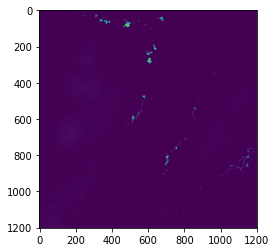

In [6]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import struct
class srtmParser(object):
 
    def parseFile(self,filename):
        # (1201x1201) big-endian numbers (signed 16-bit ints) into self.z
        fi=open(filename,"rb")
        contents=fi.read()
        fi.close()
        self.z=struct.unpack(">1442401H", contents)
 
    def writeCSV(self,filename):
        if self.z :
            fo=open(filename,"w")
            for row in range(0,1201):
                offset=row*1201
                thisrow=self.z[offset:offset+1201]
                rowdump = ",".join([str(z) for z in thisrow])
                fo.write("%s\n" % rowdump)
            fo.close()
        else:
            return None


f = srtmParser()
f.parseFile("./elevation_data/N10E123.hgt")
arr = np.zeros((1201,1201))
for r in range(0,1201):
    for c in range(0,1201):
        va=f.z[(1201*r)+c]

        arr[r][c]=float(va)

plt.imshow(arr, interpolation='bilinear',alpha=1.0)
plt.grid(False)
plt.show()

In [15]:
# sanity check --> average himalayas elevation is ~8800 meters and this region is a little under the humalayas
max( [max([i for i in j]) for j in arr] )

7805.0

In [16]:
arr.shape

(1201, 1201)

In [17]:
arr

array([[4235., 4285., 4300., ..., 4725., 4724., 4726.],
       [4205., 4235., 4270., ..., 4732., 4732., 4729.],
       [4160., 4170., 4180., ..., 4747., 4745., 4733.],
       ...,
       [1846., 1839., 1837., ..., 2089., 2054., 1993.],
       [1808., 1824., 1869., ..., 2122., 2056., 2029.],
       [1798., 1843., 1887., ..., 2133., 2076., 2051.]])

In [18]:
slopes = np.zeros((1201, 1201))
slopes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
# latitude remains fairly constant from the equator to the poles
# longitude can vary greatly
# use library to get slope